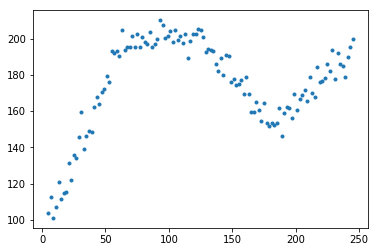

In [51]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df = pd.read_excel("TestData.xlsx")

xdata = np.array(df['TIME'])
ydata = np.array(df['yData'])

plt.plot(xdata, ydata, '.')
plt.show()

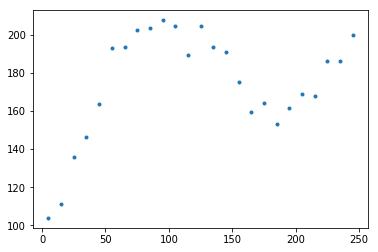

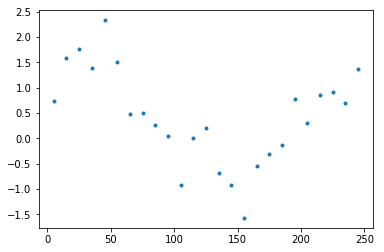

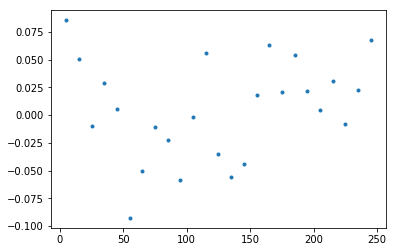

In [71]:
# take every 5th point

n_points = 5

ydata1 = [ydata[i] for i in range(len(ydata)) if i % n_points == 0]
xdata1 = [xdata[i] for i in range(len(ydata)) if i % n_points == 0]

plt.plot(xdata1, ydata1, '.')
plt.show()
dy = np.gradient(ydata1, xdata1)
d2y = np.gradient(dy, xdata1)
plt.plot(xdata1, dy, '.')
plt.show()
plt.plot(xdata1, d2y, '.')
plt.show()

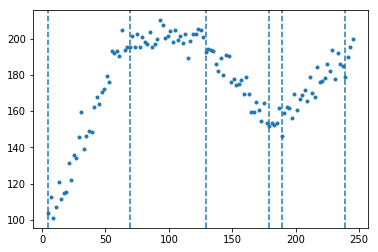

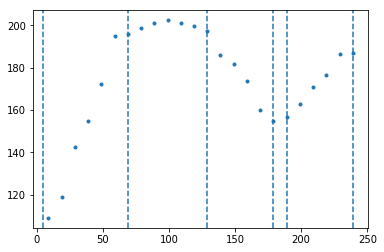

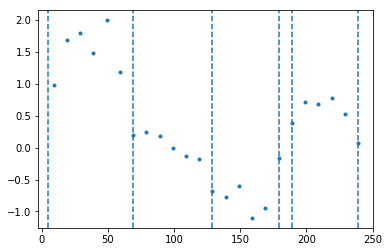

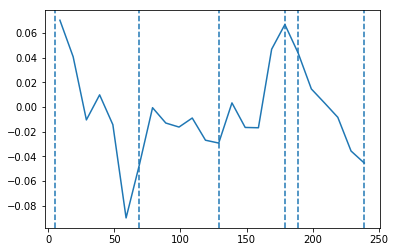

In [83]:
# centroid of every five points

n_points = 5

yAvg = [sum(ydata[i:i+n_points])/n_points for i in range(0,len(ydata),n_points)][:-1]
xAvg = [sum(xdata[i:i+n_points])/n_points for i in range(0,len(xdata),n_points)][:-1]

dyAvg = np.gradient(yAvg, xAvg)
d2yAvg = np.gradient(dyAvg, xAvg)

sets = [[]]
setIndex = 0

breaks = [xdata[0]]

ranges=[[-1000,-0.3],[-0.3,0.3],[0.3,1000]]

for ran in range(len(ranges)):
    if ranges[ran][0] <= dyAvg[0] <= ranges[ran][-1]:
        firstSlope = ran

for i in range(len(yAvg)):
    for ran in range(len(ranges)):
        if ranges[ran][0] <= dyAvg[i] <= ranges[ran][-1]:
            thisSlope = ran
            break
    if thisSlope == firstSlope:
        continue
    else:
        breaks.append(xAvg[i])
        firstSlope = thisSlope

plt.plot(xdata,ydata, '.')
for i in range(len(breaks)):
    plt.axvline(x=breaks[i], linestyle='--')
plt.show()

plt.plot(xAvg, yAvg, '.')
for i in range(len(breaks)):
    plt.axvline(x=breaks[i], linestyle='--')
plt.show()

plt.plot(xAvg, dyAvg, '.')
for i in range(len(breaks)):
    plt.axvline(x=breaks[i], linestyle='--')
plt.show()
plt.plot(xAvg, d2yAvg)
for i in range(len(breaks)):
    plt.axvline(x=breaks[i], linestyle='--')
plt.show()

